In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
TRAIN_DIR = 'train/train/'
TEST_DIR = 'test/test/'

In [3]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [4]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,train/train/sad\Training_55852652.jpg,sad
1,train/train/happy\Training_63335593.jpg,happy
2,train/train/happy\Training_34602742.jpg,happy
3,train/train/fear\Training_81574886.jpg,fear
4,train/train/happy\Training_59321714.jpg,happy


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,test/test/angry\PrivateTest_10131363.jpg,angry
1,test/test/angry\PrivateTest_10304478.jpg,angry
2,test/test/angry\PrivateTest_1054527.jpg,angry
3,test/test/angry\PrivateTest_10590091.jpg,angry
4,test/test/angry\PrivateTest_1109992.jpg,angry


<Axes: xlabel='count', ylabel='label'>

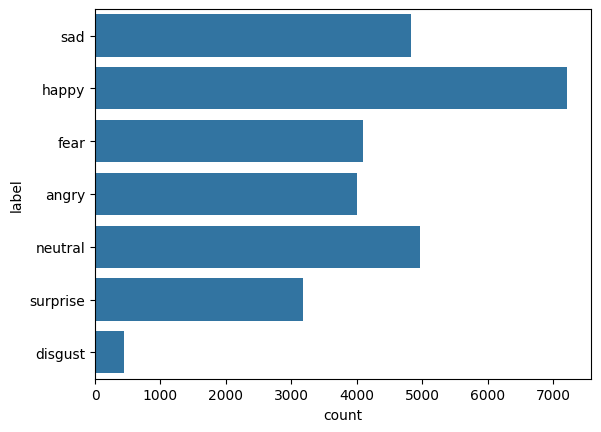

In [6]:
sns.countplot(train['label'])

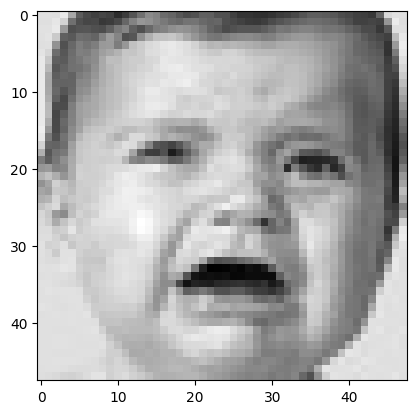

In [7]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

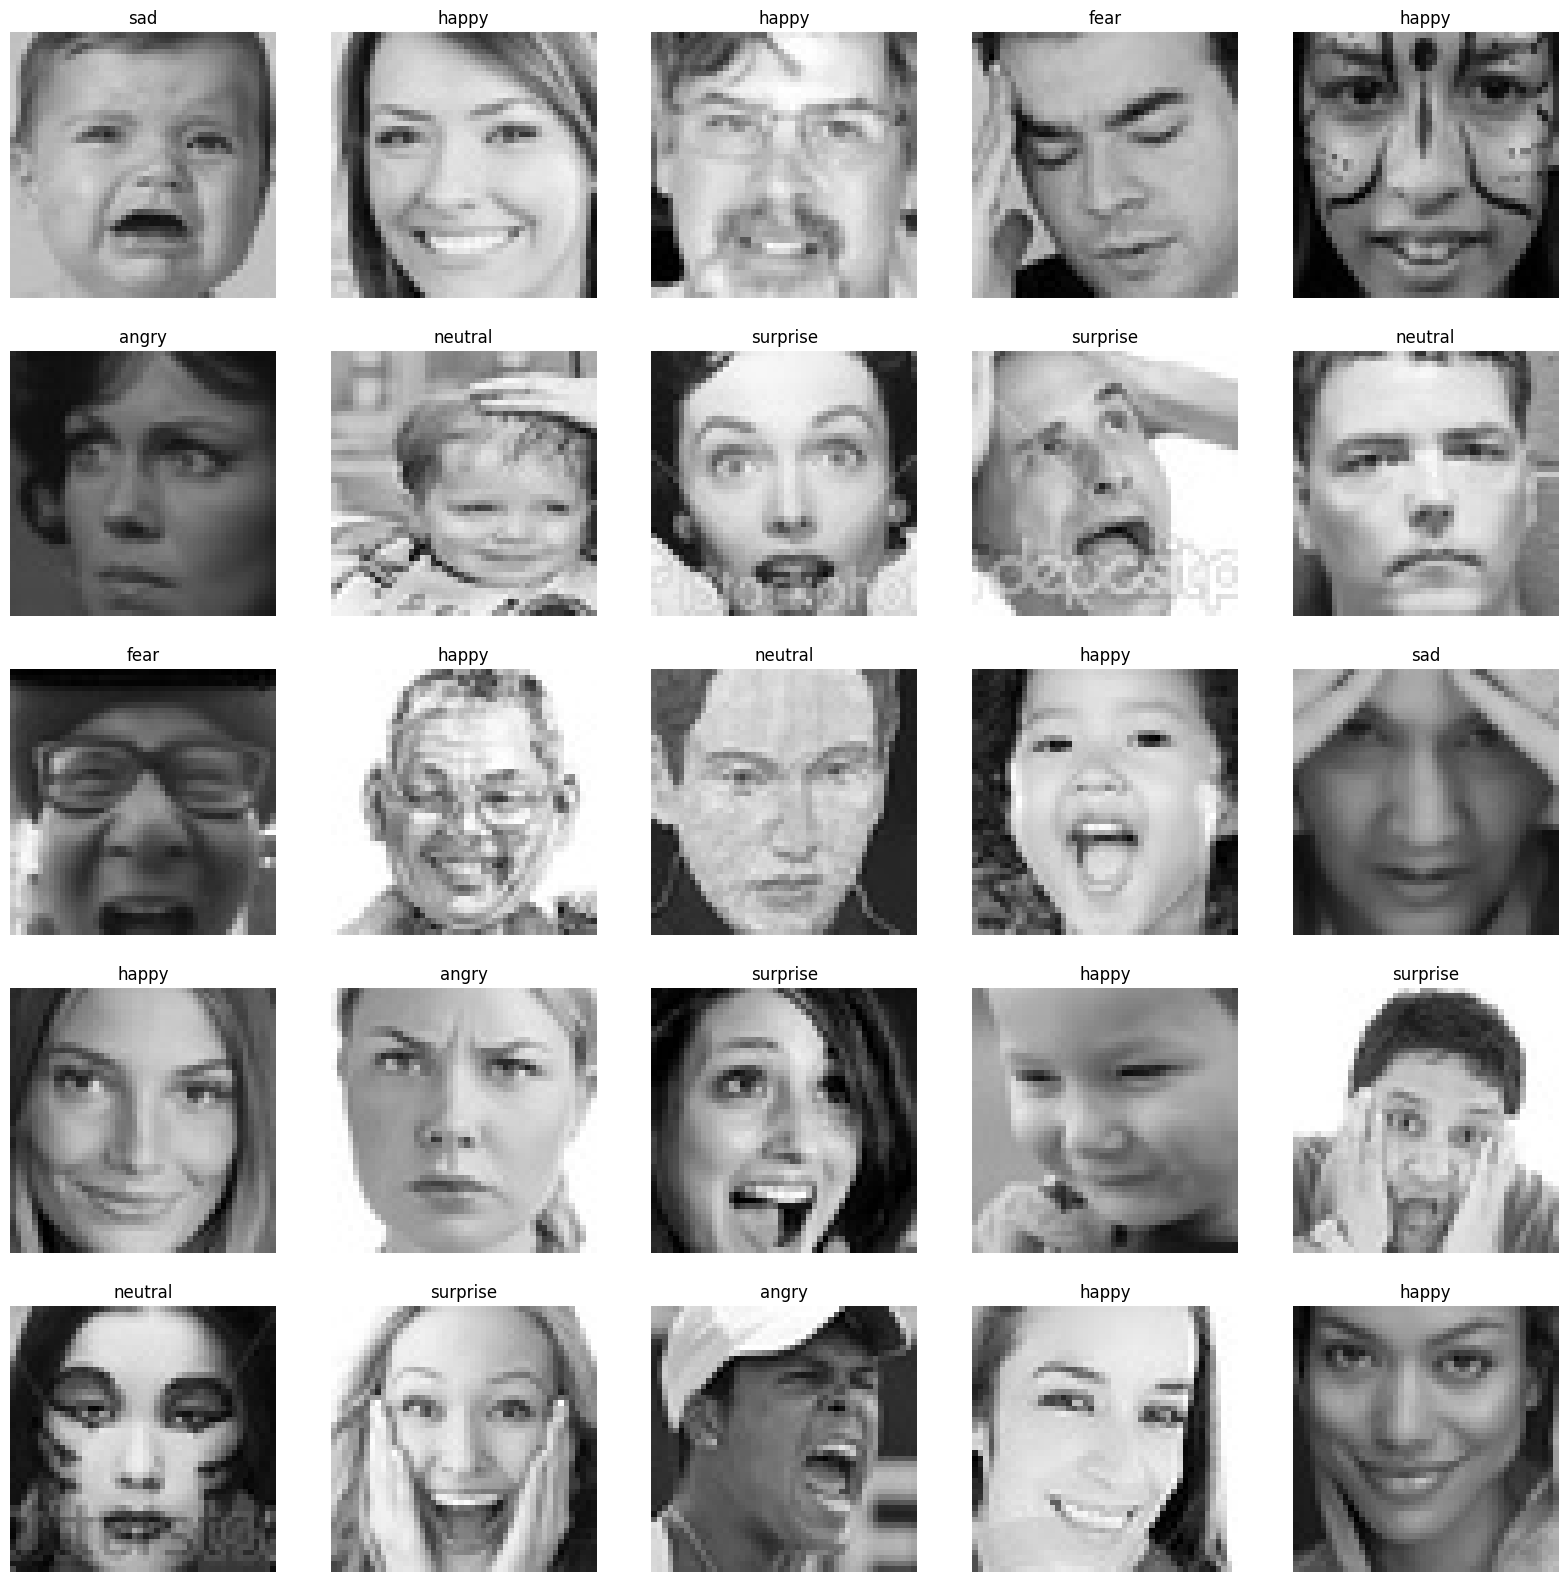

In [8]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [13]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')  # Use color_mode='grayscale'
        img = np.array(img)
        features.append(img)
    return np.array(features)

In [14]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [15]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [16]:
x_train = train_features/255.0
x_test = test_features/255.0

In [17]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [18]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0.])

In [20]:
# config
input_shape = (48, 48, 1)
output_class = 7

In [22]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.2395 - loss: 1.8369 - val_accuracy: 0.2471 - val_loss: 1.8145
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.2483 - loss: 1.8117 - val_accuracy: 0.2476 - val_loss: 1.7945
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.2621 - loss: 1.7716 - val_accuracy: 0.3454 - val_loss: 1.6553
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.3370 - loss: 1.6661 - val_accuracy: 0.4000 - val_loss: 1.5279
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.3853 - loss: 1.5739 - val_accuracy: 0.4505 - val_loss: 1.4376
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.4166 - loss: 1.5026 - val_accuracy: 0.4678 - val_loss: 1.3683
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.4481 - loss: 1.4379 - val_accuracy: 0.4925 - val_loss: 1.3158
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.4584 - loss: 1.4052 - val_accu

In [24]:
model.save('fer_trained_model_CNN.h5')


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('fer_trained_model_CNN.h5')

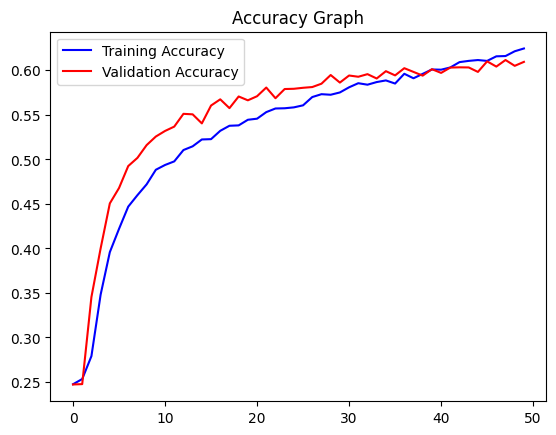

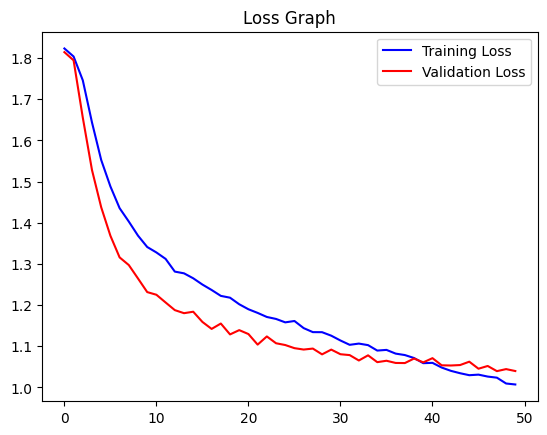

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Predicted Output: angry


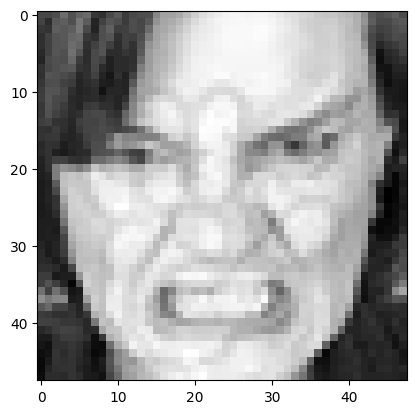

In [26]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Output: fear


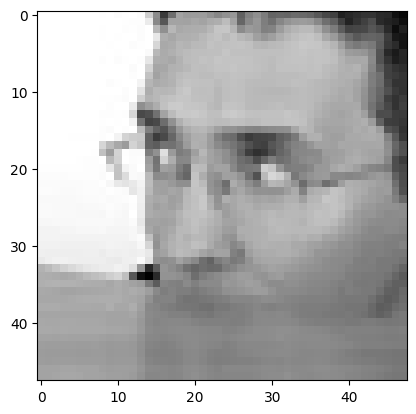

In [27]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Output: happy


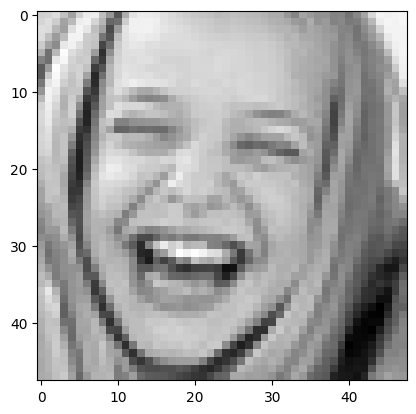

In [28]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [37]:
import numpy as np

# Convert grayscale to RGB by stacking the single channel three times
x_train_rgb = np.repeat(x_train, 3, axis=-1)
x_test_rgb = np.repeat(x_test, 3, axis=-1)


In [38]:
from tensorflow.image import resize

x_train_resized = resize(x_train_rgb, (224, 224))
x_test_resized = resize(x_test_rgb, (224, 224))


In [39]:
x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0


In [40]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.image import resize
import numpy as np

# Convert grayscale images to RGB
x_train_rgb = np.repeat(x_train, 3, axis=-1)
x_test_rgb = np.repeat(x_test, 3, axis=-1)

# Resize images to 224x224
x_train_resized = resize(x_train_rgb, (224, 224))
x_test_resized = resize(x_test_rgb, (224, 224))

# Normalize pixel values
x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0

# Load VGG19 base model
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg19_base.trainable = False  # Freeze pre-trained layers

# Build the model
model = Sequential([
    vgg19_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for FER
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_resized, y_train, epochs=50, batch_size=128,
                    validation_data=(x_test_resized, y_test))


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 224
'y' sizes: 28709


In [31]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load ResNet50 base model
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers
resnet50_base.trainable = False

# Add custom layers
model_resnet50 = Sequential([
    resnet50_base,
    Flatten(),  # Flattening the 2D feature maps
    Dense(512, activation='relu'),  # Fully connected layer
    Dropout(0.4),  # Dropout for regularization
    Dense(256, activation='relu'),  # Another fully connected layer
    Dropout(0.3),
    Dense(7, activation='softmax')  # Output layer for 7 classes
])

# Compile the model
model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model_resnet50.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,101,575 (286.49 MB)

 Trainable params: 51,513,863 (196.51 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [33]:
history_resnet50 = model_resnet50.fit(
    x=x_train, 
    y=y_train, 
    batch_size=128, 
    epochs=50, 
    validation_data=(x_test, y_test)
)

Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 48, 48), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (None, 48, 48)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 48, 48), dtype=float32)
  • training=True
  • mask=None

In [1]:
from tensorflow.keras.models import load_model
model = load_model('fer_trained_model_CNN.h5')